## Notebook: Parole Hearings - Commiting Errors When Analyzing Sensible Data

Parole hearing in the state of New York

The focus of this dataset is to study fairness according to perp location.

Some questions we can raise over this dataset:
   - It is possible to predict all many years a perp will stay in prison ?
   - Do the perp's race interferes in his/her sentence ?
       - The gender interferes ?
       - The neighborhood his comming from ?
   - Where most crimes happen ?
       - Are in poor or rich counties ?

Datasets link: https://www.kaggle.com/parole-hearing-data/parole-hearings-in-new-york-state

### Dataset Dictionary

Here we will specify only the non-intutive features

- DIN: is assigned to each offender admitted to the Department of Correctional Services. This is an internal number used as an identifier for the offender while he or she is in the custody of the Department.
- Housing or Interview Facility: This shows the Correctional Facility where the offender is being housed before his/her Board appearance. Interview facility shows the place where the interview was held. 
- Housing/Release facility: is the place where the offender was released from.
- Release Type: This is the circumstance under which the offender is released from a Correctional Facility.
- Release Date: The date an offender is released from a Correctional Facility prior to the maximum expiration date.
- Parole eligibility Date: Under certain circumstances, an offender may be released prior to serving his or her minimum term. 
- Aggregated Minimum / Maximum Sentence: These fields contain an aggregate of the amount of time the offender must serve for the crimes for which he or she was committed. (year months - year months)
- Maximum Expiration Date: If an offender is not released by the Parole Board or by conditional release, he or she will remain in custody until his or her maximum expiration date. The offender's sentence is deemed completed as of this date.
- Post Release Supervision me Date: ndicates how long the offender may be under post release supervision.
- Parole Board Discharge Date: This indicates the offender has been discharged from parole supervision before the maximum expiration date or the maximum expiration date for parole supervision.
- Parole Interview Type: This indicates the type of the next appearance by the offender before the Parole Board. It may be his or her initial appearance, reappearance, or a variety of other hearing types.
- Parole Me Date: ??


Taken from: http://www.doccs.ny.gov/calendardatadefinitions.html



### Evaluated Boroughs

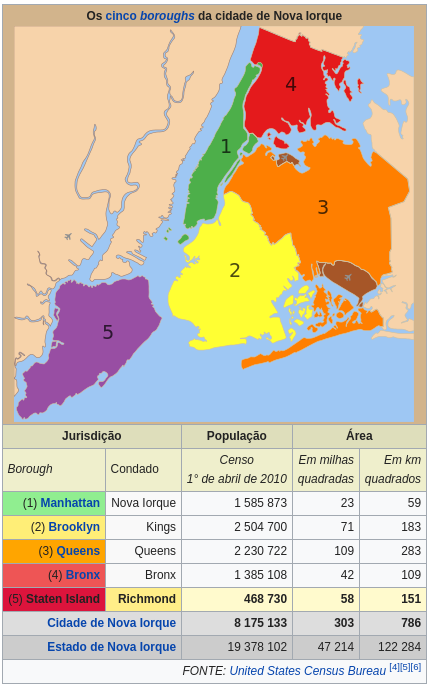

In [7]:
from IPython.display import Image
Image("Aux/evaluated_boroughs.png")

In [1]:
import datetime
import re
import time


import statistics

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("Input/data.csv", sep = ',')

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Auxiliary Function: Count Instances

In [3]:
def count_instances(df, feature):
    return list(map(lambda x: {x: len(df[df[feature] == x])}, set(df[feature])))

### Auxiliary Function: Count NaN

In [4]:
def count_nan(df):
    for col in df.columns:
        if df[col].isna().values.any():
            print(col, df[col].isna().sum(), round(df[col].isna().sum()/len(df), 5))

# count_nan(df)

### Removing invalid rows

The remove rows do not aggregate much for our analyzes, given that it not contain must of the features.

In [5]:
df = df.loc[
        (df['parole board interview date'] != '*') & 
        (df['interview decision'] != '*') &
        (df['interview decision'] != '**********') &
        (df['birth date'] != 'UNKNOWN') &
        (df['conditional release date'] != 'NONE') &
        (df['maximum expiration date'] != 'LIFE SENTENCE')
        ]

### Parsing Date 

In [6]:
date, token = [], 'parole board interview date'
for _, instance in df.iterrows():
    date.append('-'.join(instance[token].split('-')[:2]))
df[token] = date

In [7]:
def standard_tv(df, columns):

    for column in columns:
        try:
            df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
        except:
            df[column] = pd.to_datetime(df[column], format='%Y-%m')

    return df

date_columns = list(filter(lambda x: 'date' in x, df.columns))
standard_tv(df, date_columns)

,parole board interview date,din,scrape date,nysid,sex,birth date,race / ethnicity,housing or interview facility,parole board interview type,interview decision,...,crime 5 - county of commitment,crime 6 - crime of conviction,crime 6 - class,crime 6 - county of commitment,crime 7 - crime of conviction,crime 7 - class,crime 7 - county of commitment,crime 8 - crime of conviction,crime 8 - class,crime 8 - county of commitment
660,2012-08-01,03B2727,2014-08-05,08868271Z,MALE,1981-06-07,BLACK,LIVINGSTON,INITIAL,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,2012-08-01,04A5142,2014-08-05,04919051Z,MALE,2056-03-28,BLACK,LIVINGSTON,INITIAL,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,2012-08-01,05B0786,2014-08-05,04281357Q,MALE,2059-04-19,WHITE,LIVINGSTON,REAPPEAR,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,2012-08-01,09B2160,2014-08-05,08883878R,MALE,1981-07-16,BLACK,LIVINGSTON,REAPPEAR,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,2012-08-01,10A0062,2014-08-05,05705635M,MALE,1971-02-16,BLACK,ADIRONDACK,INITIAL,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,2012-08-01,10A3408,2014-08-05,06737683P,MALE,2058-08-02,HISPANIC,LIVINGSTON,ECPDO,GRANTED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,2012-08-01,10B0930,2014-08-05,06750206L,MALE,1974-09-16,BLACK,LIVINGSTON,MERIT TIME,OR EARLIER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,2012-08-01,10B2999,2014-08-05,02984681Q,MALE,1982-12-15,BLACK,LIVINGSTON,INITIAL,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,2012-08-01,10B3660,2014-08-05,08753623Y,MALE,1981-08-30,WHITE,LIVINGSTON,INITIAL,DENIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,2012-08-01,10R1708,2014-08-05,01215031K,MALE,1987-02-28,BLACK,MT. MCGREGOR,MERIT TIME,NOT GRANTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


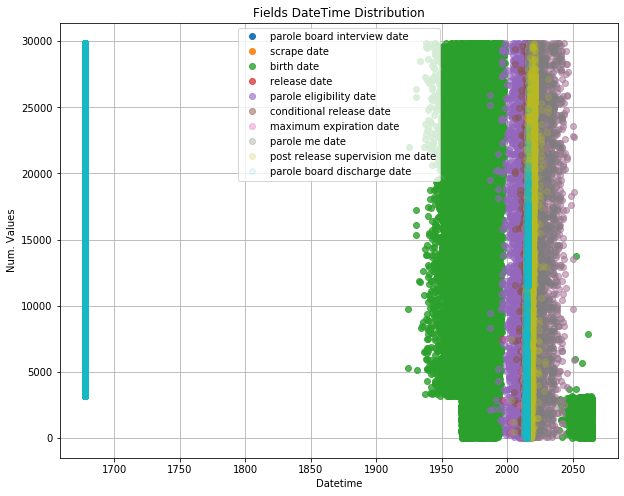

In [8]:
# filling nan date values with a mean

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

date_columns = list(filter(lambda x: 'date' in x, df.columns))

y =  [i for i in range(0, len(df[date_columns[0]]))]
alpha = 1
for column in date_columns:
    ax.plot_date(x=list(df[column]), y=y, marker='o', alpha = alpha)
    alpha-=0.1

plt.title("Fields DateTime Distribution")
plt.xlabel("Datetime")
plt.ylabel("Num. Values")
plt.grid(True)
plt.legend(date_columns)
plt.show()

In [9]:
#count_instances(df, 'post release supervision me date')
for column in date_columns:
    print(column, min(df[column]))

parole board interview date 2012-08-01 00:00:00
scrape date 2014-08-05 00:00:00
birth date 1923-11-22 00:00:00
release date 2002-06-11 00:00:00
parole eligibility date 1986-08-28 00:00:00
conditional release date 1995-10-21 00:00:00
maximum expiration date 1997-12-13 00:00:00
parole me date 2002-12-13 00:00:00
post release supervision me date 2002-12-13 00:00:00
parole board discharge date 2012-11-17 00:00:00


### Pre-Processing: Removing Useless Rows and Columns

In [10]:
pd.set_option('display.max_columns', 500)
print(df.head(5))
# removing columns with useless informartion or with many NaN values
df = df.drop(['year of entry', 'scrape date', 'din', 'nysid'],  axis=1)
# removing instances with NaN values
columns_instances = ['aggregated minimum sentence', 'aggregated maximum sentence']
df.dropna(axis=0, subset=columns_instances, inplace=True)
for feature in columns_instances:
    df = df[df[feature].str.contains("-")]

    parole board interview date      din scrape date      nysid   sex  \
660                  2012-08-01  03B2727  2014-08-05  08868271Z  MALE   
661                  2012-08-01  04A5142  2014-08-05  04919051Z  MALE   
662                  2012-08-01  05B0786  2014-08-05  04281357Q  MALE   
663                  2012-08-01  09B2160  2014-08-05  08883878R  MALE   
664                  2012-08-01  10A0062  2014-08-05  05705635M  MALE   

    birth date race / ethnicity housing or interview facility  \
660 1981-06-07            BLACK                    LIVINGSTON   
661 2056-03-28            BLACK                    LIVINGSTON   
662 2059-04-19            WHITE                    LIVINGSTON   
663 1981-07-16            BLACK                    LIVINGSTON   
664 1971-02-16            BLACK                    ADIRONDACK   

    parole board interview type interview decision  year of entry  \
660                     INITIAL             DENIED            3.0   
661                     INITIAL 

### New Field: Number of Commited Crimes

Aggregating the crimes commited.

In [11]:
crimes_columns = [feature for feature in df.columns if 'crime of conviction' in feature]
crime_counter = []
for _, instance in df.iterrows():
    crime_counter.append(len(list(filter(lambda x: isinstance(instance.loc[x], str), crimes_columns))))

df['Number of Crimes'] = crime_counter

### Selecting only Perps that at least only crime was within New York City 

In [12]:
boroughs = ['NEW YORK', 'KINGS', 'QUEENS', 'BRONX', 'RICHMOND']
df = df.loc[(df['crime 1 - county of commitment'].isin(boroughs))]

### Parsing Aggregated Minimum / Maximum sentence

- Making new columns: Min. / Max. Sentence Month, Min. / Max. Sentence Years

In [13]:
token_min = 'aggregated minimum sentence'
token_max = 'aggregated maximum sentence'
year_max, year_min, month_max, month_min = [], [], [], []
invalid_rows = []

for index, instance in df.iterrows():

    year_max.append(instance[token_max].split('-')[0])
    month_max.append(instance[token_max].split('-')[1])

    year_min.append(instance[token_min].split('-')[0])
    month_min.append(instance[token_min].split('-')[1])

    
df['Max Sentence Month'] = month_max
df['Max Sentence Year'] = year_max

df['Min Sentence Month'] = month_min
df['Min Sentence Year'] = year_min

df.drop([token_min, token_max], axis=1)

,parole board interview date,sex,birth date,race / ethnicity,housing or interview facility,parole board interview type,interview decision,release date,release type,housing/release facility,parole eligibility date,conditional release date,maximum expiration date,parole me date,post release supervision me date,parole board discharge date,crime 1 - crime of conviction,crime 1 - class,crime 1 - county of commitment,crime 2 - crime of conviction,crime 2 - class,crime 2 - county of commitment,crime 3 - crime of conviction,crime 3 - class,crime 3 - county of commitment,crime 4 - crime of conviction,crime 4 - class,crime 4 - county of commitment,crime 5 - crime of conviction,crime 5 - class,crime 5 - county of commitment,crime 6 - crime of conviction,crime 6 - class,crime 6 - county of commitment,crime 7 - crime of conviction,crime 7 - class,crime 7 - county of commitment,crime 8 - crime of conviction,crime 8 - class,crime 8 - county of commitment,Number of Crimes,Max Sentence Month,Max Sentence Year,Min Sentence Month,Min Sentence Year
664,2012-08-01,MALE,1971-02-16,BLACK,ADIRONDACK,INITIAL,DENIED,2014-01-15,CR,QUEENSBORO,2012-11-15,2014-01-15,2016-05-15,2016-05-15,2015-01-13,2015-01-13,GRAND LARCENY-3,D,QUEENS,ATT CP FORG INST-1,D,NEW YORK,CP FORG INST-2,D,NASSAU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,00,07,06,03
666,2012-08-01,MALE,2058-08-02,HISPANIC,LIVINGSTON,ECPDO,GRANTED,2012-08-29,BOARD,ORLEANS,2015-01-13,2013-10-20,2014-07-10,2017-08-29,2017-08-29,2015-01-13,CPCS-2,A,NEW YORK,CPCS-2,A,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,00,05,00,00
670,2012-08-01,MALE,1987-02-28,BLACK,MT. MCGREGOR,MERIT TIME,NOT GRANTD,2013-04-23,BOARD,MT. MCGREGOR,2013-04-23,2015-08-12,2018-04-23,2018-04-23,2015-01-13,2015-01-13,ROBBERY-3,D,KINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,00,05,06,02
671,2012-08-01,MALE,2054-10-08,WHITE,MT. MCGREGOR,MERIT TIME,NOT GRANTD,2013-04-19,BOARD,MT. MCGREGOR,2013-04-20,2015-10-20,2018-04-20,2018-04-20,2015-01-13,2014-04-19,GRAND LARCENY-2,C,NEW YORK,GRAND LARCENY-3,D,NEW YORK,GRAND LARCENY-2,C,NEW YORK,GRAND LARCENY-3,D,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,07,06,06,02
672,2012-08-01,MALE,2064-11-14,BLACK,ADIRONDACK,INITIAL,DENIED,2013-03-18,CR,QUEENSBORO,2012-09-18,2013-03-18,2014-03-18,2014-03-18,2015-01-13,2014-03-18,VEH ASSAULT-2,E,KINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,00,03,06,01
673,2012-08-01,MALE,1979-06-19,HISPANIC,ADIRONDACK,MERIT TIME,NOT GRANTD,2013-04-17,CR,ADIRONDACK,2013-04-17,2013-04-17,2013-09-23,2015-08-29,2015-08-29,2015-01-13,CSCS-3 >79,B,BRONX,GRAND LARCENY-4,E,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,00,03,06,02
675,2012-08-01,MALE,1966-03-06,BLACK,LIVINGSTON,INITIAL,DENIED,2013-07-12,CR,LIVINGSTON,2012-11-14,2013-07-14,2014-11-14,2014-11-14,2015-01-13,2015-01-13,BURGLARY-3,D,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,00,04,00,02
676,2012-08-01,MALE,1967-09-23,HISPANIC,WALLKILL,INITIAL,DENIED,2013-07-15,CR,WALLKILL,2012-11-15,2013-07-15,2014-11-15,2014-11-15,2015-01-13,2015-01-13,UNAUT USE VEH-2,E,NEW YORK,CPW-3/NON-VFO,D,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,00,04,00,02
678,2012-08-01,MALE,1978-10-01,HISPANIC,ADIRONDACK,SUPP MERIT,OR EARLIER,2015-01-13,NaN,QUEENSBORO,2013-06-15,2014-09-15,2015-06-15,2015-06-15,2015-01-13,2015-01-13,CPCS-5 >79,D,KINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,00,04,00,02
692,2012-08-01,MALE,2060-07-21,BLACK,LIVINGSTON,INITIAL,DENIED,2013-08-27,CR,QUEENSBORO,2012-11-14,2013-08-27,2015-05-14,2017-05-25,2017-05-25,2015-01-13,BURGLARY-3,D,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,00,05,06,02


### Tasks:
    - Remove all NaN values (mainly from crimes features)
    - Remove category features and pass all for number

In [14]:
count_instances(df, 'interview decision') # define each one of these classes and group equal values

[{'DENIED': 6629},
 {'GRANTED': 133},
 {'NOT GRANTD': 1105},
 {'OR EARLIER': 2460},
 {'RCND&RELSE;': 12},
 {'OPEN DATE': 2010},
 {'RCND&HOLD;': 4},
 {'REINSTATE': 3},
 {'PAROLED': 39}]

### Filling NaN from crime features

In [15]:
crime_columns = list(filter(lambda x: 'crime' in x, df.columns))
for column in crime_columns:
    df[column].fillna('Not Commited', inplace = True)

In [16]:
df.dtypes

parole board interview date         datetime64[ns]
sex                                         object
birth date                          datetime64[ns]
race / ethnicity                            object
housing or interview facility               object
parole board interview type                 object
interview decision                          object
aggregated minimum sentence                 object
aggregated maximum sentence                 object
release date                        datetime64[ns]
release type                                object
housing/release facility                    object
parole eligibility date             datetime64[ns]
conditional release date            datetime64[ns]
maximum expiration date             datetime64[ns]
parole me date                      datetime64[ns]
post release supervision me date    datetime64[ns]
parole board discharge date         datetime64[ns]
crime 1 - crime of conviction               object
crime 1 - class                

### Removing Special Characteres and Number of Crimes

In [17]:
commited_crimes = list(filter(lambda x: 'crime of conviction' in x, df.columns))
for column in commited_crimes:
    df[column] = list(map(lambda x: re.sub(r'[^A-z ]+', '', x), df[column]))
    print(set(df[column]))

{'FALS BUS REC', 'ATT CRIM MISCHIEF', 'ATT CRIM SEX ACT ', 'WELFARE FRAUD', 'SODOMY ', 'CRIM USURY', 'ATT PROM PROST', 'POS CHLD SX PRF', 'CPSP', 'ESCAPE', 'AGGR SX ABUS', 'ATT GRAND LARCENY', 'CP FORG INST', 'CRIM MISCHIEF', 'AG VEH HOMICIDE', 'IDENTITY THEFT', 'ATT CSCS ', 'CPWVFO', 'REW OFF MISC', 'STALKING ST', 'MONEY LAUNDRY ', 'AGGR ASSAULT', 'BRIBERY', 'ATT RAPE', 'CPCS ', 'INDC MATMINR', 'CURSEX CHLD', 'ATT MURDER', 'ATT IDENTITY THEFT', 'ATT ROBBERY', 'STRANGULATION ', 'COMP TAMPER', 'SOLICITATION', 'PROMOTNG GAMB', 'ARSON', 'CSCS', 'ATT ENTRPSE CORRUPT', 'AGGR CRIM CNTPT', 'ROBBERY', 'HINDER PROSEC', 'STALKING', 'COMP TRESPASS', 'CRIM CONTEMPT', 'RAPE ', 'AGGR UNLIC OP ', 'ATT STALKING', 'ATT STRANGULATION ', 'POSS MARIHUANA', 'AGGRAV DWI PR', 'ATT KIDNAPPING', 'SOR VIOL ST', 'MFRTRANSP WEAP', 'CS FIREARM', 'PRISON CONTR', 'PRO SEX PFM CHD', 'TAMP WITNESS', 'CPCS', 'UNLW SRVEIL  ', 'PROM PROST', 'FAIL REGSEX ', 'MURDER', 'RIOT', 'GRD LRCNY AUTO', 'ATT FACILITATION', 'POS PERS

### Categorizing all variables

In [18]:
categories = []
removed_columns = ['Number of Crimes']
for column in df.columns:
    if column not in removed_columns and 'date' not in column:
        categories.append({column :dict(enumerate(df[column].astype('category').cat.categories))})
        df[column] = df[column].astype("category").cat.codes

### Auxiliary Function: Statistic  Validation

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

def statistic_validation(x, y, model):
    
    scores = cross_val_score(model, x, y, scoring='f1_micro', cv=10)
    print(scores)
    print("Mean: ", statistics.mean(scores))
    print("Std. Deviation: ", statistics.stdev(scores))

    for feat, importance in zip(df.columns, model.feature_importances_):
        break
        print(feat, importance)

In [20]:
def convert_to_seconds(value):

    if value is pd.NaT:
        return 0

    t = value.to_pydatetime()

    return time.mktime(t.timetuple())

In [21]:
from sklearn.utils import shuffle

y = df['interview decision']
x = df.drop(['interview decision'], axis = 1)
x,y = shuffle(x, y)

In [26]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

df_copy = df.copy()
date_columns = list(filter(lambda x: 'date' in x, df_copy.columns))
for column in date_columns:
    values = list(map(lambda x: convert_to_seconds(x), df_copy[column]))
    df_copy[column] = values

y = df_copy['interview decision']
x = df_copy.drop(['interview decision'], axis = 1)
x,y = shuffle(x, y)

model = model.fit(x, y)
statistic_validation(x, y, model)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.66532582 0.68785197 0.67793881 0.68467742 0.65213882 0.67447496
 0.6631664  0.67770598 0.65912763 0.6763754 ]
Mean:  0.6718783209157471
Std. Deviation:  0.01148763921593668


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

model = model.fit(X_train, y_train)
y_predicted  = model.predict(X_test)

confusion_matrix(y_test, y_predicted)

array([[1701,    0,    1,   23,  240,    0,    0,    0,    0],
       [  10,   14,    0,    7,    2,    0,    0,    0,    0],
       [  34,    0,  234,   39,   28,    0,    0,    0,    0],
       [  64,    6,   27,  436,   96,    1,    0,    0,    0],
       [ 408,    7,   38,  131,  148,    1,    0,    1,    0],
       [   6,    0,    0,    9,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    0,    1,    2,    1,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0]])